<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80_%EC%84%A0%ED%98%95%EA%B8%B0%EC%A0%80%ED%95%A8%EC%88%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **선형 기저 함수 모델**
지금까지는 데이터를 토대로 직선모델을 구현하여 다음 데이터를 예측했다면, 어떤 데이터들은 직선보다 곡선 모델을 생각하면 오차가 더 줄어들 수 있으므로 이번에는 곡선 모델을 생각해본다.

곡선 모델에는 여러가지가 있는데 그 중 선형 기저 함수 모델은 기존에 소개한 선형 회귀 모델의 x를 가우스 함수를 선택하여 ϕ_j(x)로 대체하여 여러 형태의 함수를 만드는 것이다. 가우스 기저함수는 다음과 같고,

ϕ_j(x)=exp{-(x - μ_j)^2/(2*s^2)}

함수의 확장 정도는 s로 설계자가 결정하는 매개 변수이고 이는 모든 가우스 함수에 공통의 매개 변수이다. μ_j 는 가우스 함수의 중심 위치이고 이도 모델의 설계자가 결정하는 매개 변수이다.

데이터는 앞에서 다뤘던 나이에 따른 키의 상관관계 데이터를 이용하자.

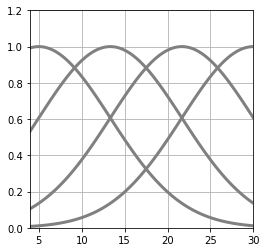

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 나이에 따른 키의 인공 데이터 생성
np.random.seed(seed=1)
X_min=4 #X의 하한
X_max=30 #X의 상한
X_n=16 #데이터 개수
X=5+25*np.random.rand(X_n) #16명 나이 설정
Prm_c=[170, 108, 0.2] #생성 매개 변수
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n) #T:출력값
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

#저장이 되어있다면 ??
#outfile=np.load('ch5_data.npz')
#X=outfile['X']
#X_min=outfile['X_min']
#...
#왜 안 돌아감? 하나에서 같이 해야됨? npz 파일??

##가우스 함수
def gauss(x,mu,s):
  return np.exp(-(x-mu)**2/(2*s**2))

##main
M=4 #설계자 설정
mu=np.linspace(5,30,M)
s=mu[1]-mu[0]
xb=np.linspace(X_min,X_max,100)
plt.figure(figsize=(4,4))
for j in range(M):
  y=gauss(xb,mu[j],s)
  plt.plot(xb,y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()



왼쪽부터 ϕ_1(x), ϕ_2(x), ϕ_3(x), ϕ_4(x) 라고 하고 각각 매겨변수 w0,w1,w2,w3 를 곱해 합한 함수를

y(x,w)=ϕ_1(x)*w0+ ϕ_2(x)*w1+ ϕ_3(x)*w2+ ϕ_4(x)*w3 +w4

라고 하면 이것이 M=4의 선형 기저 함수 모델이고 w는 가중치 매개 변수라고 하며 마지막 w4에는 phi 함수가 곱해지지 않았으므로 임의로 ϕ_4(x)=1 을 추가하여 ϕ_j(x) 행렬을 만들고 앞서 D차원에서 J가 최소가 되는 w를 구하는 방법에 x 행렬 대신 ϕ행렬 (계획 행렬) 을 넣으면 최적의 w를 찾을 수 있다.

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


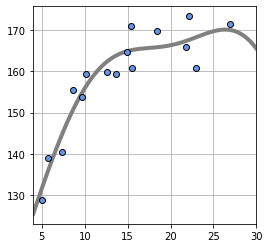

In [19]:
##선형 기저 함수 모델
def gauss_func(w,x):
  m=len(w)-1
  mu=np.linspace(5,30,m)
  s=mu[1]-mu[0]
  y=np.zeros_like(x) #x와 같은 크기로 요소가 0의 행렬 y를 작성
  for j in range(m):
    y=y+w[j]*gauss(x,mu[j],s)
  y=y+w[m]
  return y

##선형 기저 함수 모델의 mse (평균 제곱 오차)
#피팅의 수준 산출
def mse_gauss_func(x,t,w):
  y=gauss_func(w,x)
  mse=np.mean((y-t)**2)
  return mse

##선형 기저 함수 모델의 해석해 (정확한 값)
def fit_gauss_func(x,t,m):
  mu=np.linspace(5,30,m)
  s=mu[1]-mu[0]
  n=x.shape[0]
  psi=np.ones((n,m+1)) #항상 1 출력하는 더미함수 (psi_(m+1)=1 만들기 위함)
  for j in range (m):
    psi[:,j]=gauss(x,mu[j],s)
  psi_T=np.transpose(psi)
  
  a=np.linalg.inv(psi_T.dot(psi))
  b=a.dot(psi_T)
  w=b.dot(t)
  return w

##가우스 기저 함수 표시
def show_gauss_func(w):
  xb=np.linspace(X_min,X_max,100)
  y=gauss_func(w,xb)
  plt.plot(xb,y,c=[.5,.5,.5], lw=4)

##main
plt.figure(figsize=(4,4))
M=4
W=fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T, marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

  

직선 모델의 SD=7cm 보다 SD=3.98 cm 로 더 줄어든 것을 볼 수 있다.

출처: 파이썬으로 배우는 머신러닝의 교과서-이시카와아키히코